<a href="https://colab.research.google.com/github/jihun5/jupyter_home/blob/main/1_7_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
# 합성곱층은 32개의 필터를 사용, 커널의 크기는 (3,3)

In [ ]:
# 풀링 층을 추가하기
model.add(keras.layers.MaxPooling2D(2)) # (2,2) 풀링을 적용
# 이 최대 풀링을 통과한 특성 맵의 크기는 (14,14, 32)


In [ ]:
# 첫번째 합성곱-풀링층에 두 번째 합성곱 풀링층 추가하기
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
# 최종 크기는 (7,7,64)

In [ ]:
# 3차원 특성맵을 일렬로 펼치기 마지막 10개의 뉴련을 가진 출력층에서 확률을 계산하기 때문
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0,4))
model.add(keras.layers.Dense(10, activation='softmax'))
# 은닉층과 출력층 사이의 드롭아웃을 두어 과적합을 막는다.

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

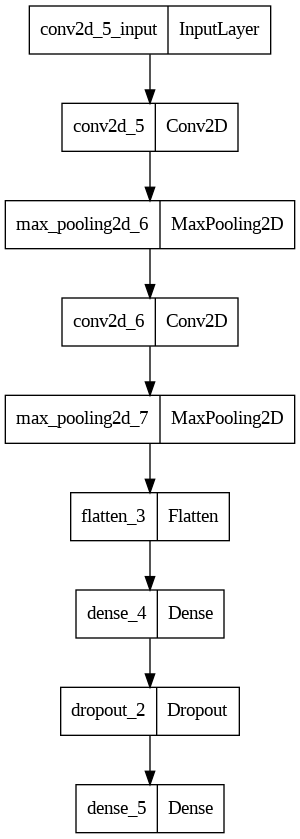

In [20]:
keras.utils.plot_model(model)

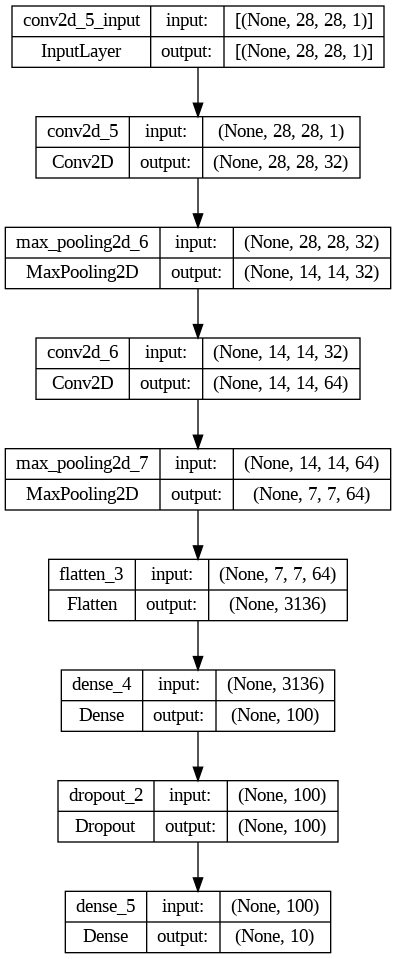

In [22]:
keras.utils.plot_model(model, show_shapes=True)

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 71s 47ms/step - loss: 0.4397 - accuracy: 0.8437 - val_loss: 0.3207 - val_accuracy: 0.8859
Epoch 2/20
   3/1500 [..............................] - ETA: 52s - loss: 0.3376 - accuracy: 0.8750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 66s 44ms/step - loss: 0.2824 - accuracy: 0.8986 - val_loss: 0.2472 - val_accuracy: 0.9090
Epoch 3/20
1500/1500 [==============================] - 65s 44ms/step - loss: 0.2341 - accuracy: 0.9143 - val_loss: 0.2616 - val_accuracy: 0.9017
Epoch 4/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2029 - accuracy: 0.9257 - val_loss: 0.2366 - val_accuracy: 0.9116
Epoch 5/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.1752 - accuracy: 0.9343 - val_loss: 0.2272 - val_accuracy: 0.9167
Epoch 6/20
1500/1500 [==============================] - 79s 53ms/step - loss: 0.1520 - accuracy: 0.9436 - val_loss: 0.2310 - val_accuracy: 0.9181
Epoch 7/20
1500/1500 [==============================] - 90s 60ms/step - loss: 0.1304 - accuracy: 0.9519 - val_loss: 0.2425 - val_accuracy: 0.9124


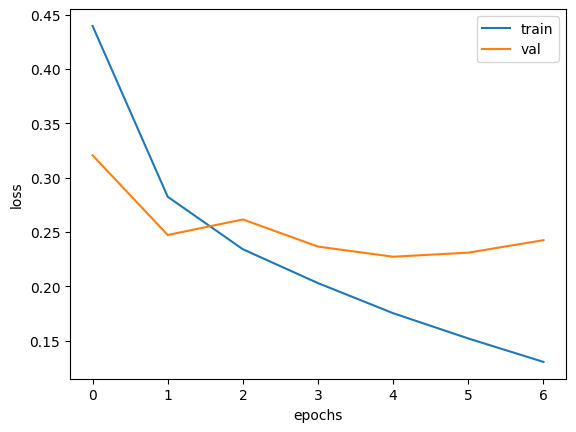

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Early-Stopping 클래스에서 restore_best_weights 매개변수를 True로 지정했음으로 현재 model 객체가 최적의 모델 파라미터로 복원되어 있다.

In [26]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 5s 14ms/step - loss: 0.2272 - accuracy: 0.9167


[0.22723278403282166, 0.9166666865348816]

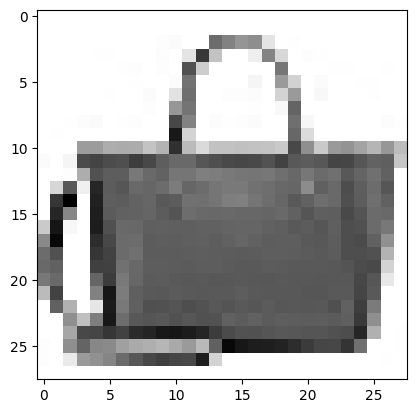

In [27]:
# 이미지 확인
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [29]:
preds = model.predict(val_scaled[0:1])
print(preds)
# 왜 슬라이싱을 사용하는가? -> 샘플을 전달할 때 (1, 28, 28, 1)을 전달해야 함으로

1/1 [==============================] - 0s 38ms/step
[[1.5584281e-08 4.9962963e-13 1.3746064e-10 2.3559776e-09 7.7421186e-10
  1.9426716e-08 8.2631209e-09 1.5746906e-09 1.0000000e+00 4.6439844e-10]]


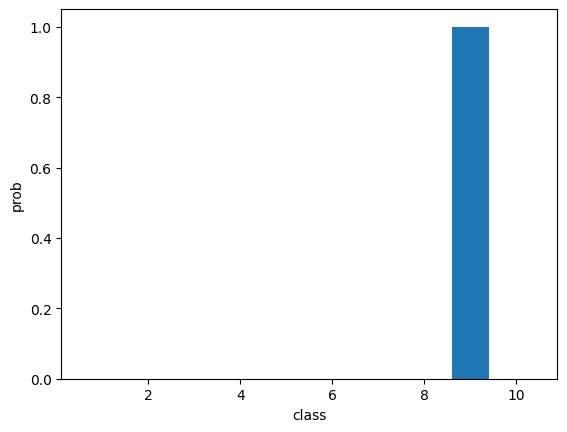

In [30]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [31]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달','셔츠', '스니커즈', '가방', '앵클부츠']

In [32]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [33]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 6s 18ms/step - loss: 0.2410 - accuracy: 0.9128


[0.24095231294631958, 0.9128000140190125]